# Модели регрессии
## Цель работы
Познакомиться с основными приемами работы с моделями регрессии в scikit-learn.


## Задания для выполнения
1. Загрузите встроенные датасет о ценах на недвижимость в Калифорнии.
2. Постройте модель регрессии для предсказания цены конкретного объекта.
3. Оцените качество построенной модели с помощью визуализации и коэффициента детерминации.
4. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 1. Загрузите встроенные датасет о ценах на недвижимость в Калифорнии.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

In [3]:
california = fetch_california_housing()

In [4]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [6]:
c_data = pd.DataFrame(california.data, columns = california.feature_names)
c_data['Price'] = california.target

In [7]:
c_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [8]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
c_data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [10]:
c_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
c_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


### 2. Постройте модель регрессии для предсказания цены конкретного объекта.

In [12]:
y = california.target
X = california.data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.coef_

array([ 4.33986387e-01,  9.73615918e-03, -1.01085528e-01,  6.24040644e-01,
       -4.40682456e-06, -3.41201778e-03, -4.26041171e-01, -4.39126251e-01])

In [16]:
y_pred = lr.predict(X_test)

### 3. Оцените качество построенной модели с помощью визуализации и коэффициента детерминации.

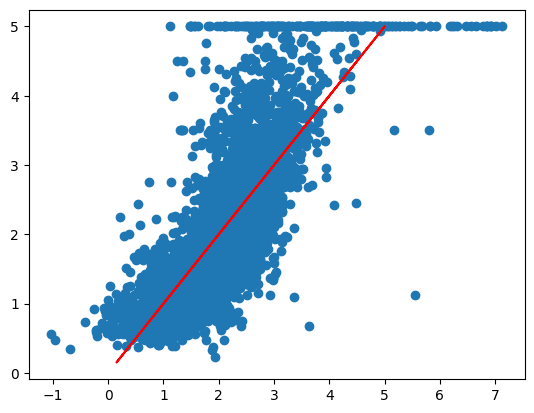

In [17]:
plt.scatter(y_pred, y_test)
plt.plot(y, y, c='r')

In [18]:
r2_lin = r2_score(y_test, y_pred)

In [19]:
r2_lin

0.6084163554240467

### 4. Постройте альтернативную полиномиальную модель, сравните ее с предыдущей.

In [20]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [21]:
polynomial = LinearRegression()
polynomial.fit(X_train_poly, y_train)
y_pred_poly = polynomial.predict(X_test_poly)

In [22]:
r2_poly = r2_score(y_test, y_pred_poly)

In [23]:
r2_poly

0.6562069350119357

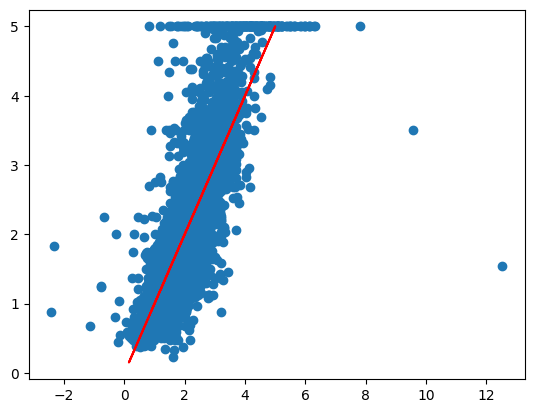

In [24]:
plt.scatter(y_pred_poly, y_test)
plt.plot(y, y, c='r')

## Задания для самостоятельного выполнения

In [ ]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        "Линейная регрессия": LinearRegression(),
        "Гребневая регрессия": Ridge(),
        "Лассо регрессия": Lasso(),
        "ElasticNet регрессия": ElasticNet(),
        "Метод опорных векторов (без ядра)": SVR(kernel='linear'),
        "Метод опорных векторов (гауссовое ядро)": SVR(kernel='rbf'),
        "Метод опорных векторов (полиномиальное ядро)": SVR(kernel='poly'),
        "Метод ближайших соседей": KNeighborsRegressor(),
        "Многослойный перцептрон": MLPRegressor(max_iter=1000),
        "Дерево решений": DecisionTreeRegressor(),
        "Случайный лес": RandomForestRegressor(),
        "Беггинг": BaggingRegressor()
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Метрики
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        
        # Кросс-валидация - промежуточный этап оценки модели
        cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()

        # Выводим результаты
        print(f"{model_name}:")
        print(f"  R²: {r2:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  MSE: {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  Кросс-валидация: {cv_score:.4f}\n")

In [ ]:
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
train_and_evaluate_models(X_train, X_test, y_train, y_test)

Линейная регрессия:
  R²: 0.4526
  MAE: 42.7941
  MSE: 2900.1936
  RMSE: 53.8534
  Кросс-валидация: 0.4493

Гребневая регрессия:
  R²: 0.4192
  MAE: 46.1389
  MSE: 3077.4159
  RMSE: 55.4745
  Кросс-валидация: 0.3802

Лассо регрессия:
  R²: 0.3576
  MAE: 49.7303
  MSE: 3403.5757
  RMSE: 58.3402
  Кросс-валидация: 0.3238

ElasticNet регрессия:
  R²: -0.0025
  MAE: 63.7059
  MSE: 5311.2128
  RMSE: 72.8781
  Кросс-валидация: -0.0216

Метод опорных векторов (без ядра):
  R²: 0.0203
  MAE: 61.9045
  MSE: 5190.3877
  RMSE: 72.0443
  Кросс-валидация: -0.0263

Метод опорных векторов (гауссовое ядро):
  R²: 0.1821
  MAE: 56.0237
  MSE: 4333.2860
  RMSE: 65.8277
  Кросс-валидация: 0.1122

Метод опорных векторов (полиномиальное ядро):
  R²: 0.2822
  MAE: 51.6617
  MSE: 3803.0441
  RMSE: 61.6688
  Кросс-валидация: 0.1794

Метод ближайших соседей:
  R²: 0.4302
  MAE: 42.7708
  MSE: 3019.0755
  RMSE: 54.9461
  Кросс-валидация: 0.3172



c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic 

Многослойный перцептрон:
  R²: 0.3998
  MAE: 47.1258
  MSE: 3179.9547
  RMSE: 56.3911
  Кросс-валидация: 0.3788

Дерево решений:
  R²: 0.0644
  MAE: 56.7753
  MSE: 4956.7528
  RMSE: 70.4042
  Кросс-валидация: -0.0554

Случайный лес:
  R²: 0.4395
  MAE: 43.8866
  MSE: 2969.5508
  RMSE: 54.4936
  Кросс-валидация: 0.3945

Беггинг:
  R²: 0.3726
  MAE: 45.5348
  MSE: 3324.0355
  RMSE: 57.6544
  Кросс-валидация: 0.3726

